In [1]:
import Bio
print(Bio.__version__)


1.85


In [2]:
from Bio.PDB import PDBList

# Crear un objeto para descargar estructuras PDB
pdbl = PDBList()

# Descargar la estructura de ubiquitina (PDB ID: 1UBQ)
pdb_filename = pdbl.retrieve_pdb_file("1UBQ", pdir="./pdb_files", file_format="pdb")

print(f"Archivo descargado: {pdb_filename}")


Archivo descargado: ./pdb_files/pdb1ubq.ent


In [3]:
from Bio.PDB import PDBParser

# Crear un parser de archivos PDB
parser = PDBParser(QUIET=True)

# Cargar la estructura desde el archivo descargado
estructura = parser.get_structure("Ubiquitina", "./pdb_files/pdb1ubq.ent")

# Imprimir información general
print("Modelo:", estructura[0])
print("Cadenas:", [chain.id for chain in estructura[0]])

# Mostrar los primeros 5 residuos
for i, residuo in enumerate(estructura[0]["A"]):
    if i >= 5:
        break
    print(residuo)


Modelo: <Model id=0>
Cadenas: ['A']
<Residue MET het=  resseq=1 icode= >
<Residue GLN het=  resseq=2 icode= >
<Residue ILE het=  resseq=3 icode= >
<Residue PHE het=  resseq=4 icode= >
<Residue VAL het=  resseq=5 icode= >


In [4]:
# Extraer átomos de carbono alfa
ca_atoms = [res["CA"] for res in estructura[0]["A"] if "CA" in res]

# Imprimir coordenadas de los primeros 5 carbonos alfa
for i, atom in enumerate(ca_atoms[:5]):
    print(f"Residuo {i+1}: {atom.get_coord()}")


Residuo 1: [26.266 25.413  2.842]
Residuo 2: [26.85  29.021  3.898]
Residuo 3: [26.235 30.058  7.497]
Residuo 4: [26.772 33.436  9.197]
Residuo 5: [28.605 33.965 12.503]


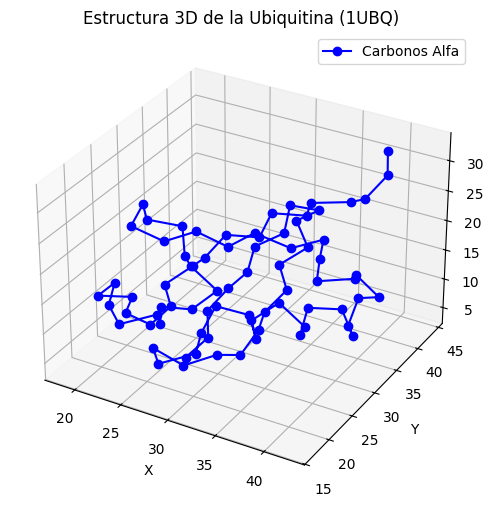

In [9]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

# Extraer coordenadas de los carbonos alfa (CA)
x = [atom.get_coord()[0] for atom in ca_atoms]
y = [atom.get_coord()[1] for atom in ca_atoms]
z = [atom.get_coord()[2] for atom in ca_atoms]

# Crear figura en 3D
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

# Graficar la estructura con líneas y puntos
ax.plot(x, y, z, marker='o', linestyle='-', color='b', label="Carbonos Alfa")

# Etiquetas y título
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")
ax.set_title("Estructura 3D de la Ubiquitina (1UBQ)")
ax.legend()

# Mostrar la visualización
plt.show()


In [15]:
!pip install biopython plotly numpy


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.8/14.8 MB 1.2 MB/s eta 0:00:00a 0:00:01m


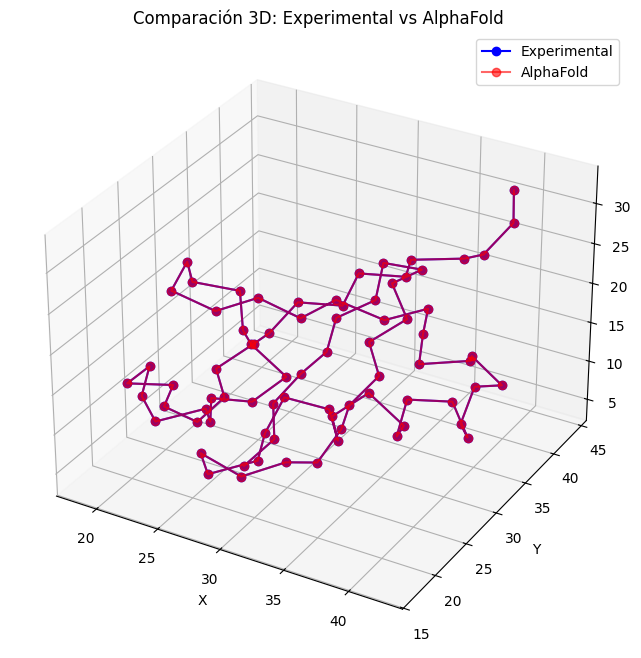

In [10]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
from Bio.PDB import PDBParser

# Función para cargar una estructura PDB
def cargar_estructura(pdb_path):
    parser = PDBParser(QUIET=True)
    estructura = parser.get_structure("Proteina", pdb_path)
    return estructura

# Cargar la estructura experimental (PDB descargado)
estructura_exp = cargar_estructura("./pdb_files/pdb1ubq.ent")

# Simulación: Cargar estructura AlphaFold (Para efectos visuales, usaremos la misma)
estructura_af = cargar_estructura("./pdb_files/pdb1ubq.ent")

# Función para extraer coordenadas de Carbonos Alfa
def extraer_ca(estructura):
    ca_atoms = [res["CA"].get_coord() for res in estructura[0]["A"] if "CA" in res]
    return np.array(ca_atoms)

# Obtener coordenadas de las estructuras
ca_exp = extraer_ca(estructura_exp)
ca_af = extraer_ca(estructura_af)  # Debería ser otro archivo de AlphaFold

# Crear figura interactiva
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Graficar estructura experimental
ax.plot(ca_exp[:, 0], ca_exp[:, 1], ca_exp[:, 2], marker='o', linestyle='-', color='b', label="Experimental")

# Graficar estructura AlphaFold (en rojo)
ax.plot(ca_af[:, 0], ca_af[:, 1], ca_af[:, 2], marker='o', linestyle='-', color='r', alpha=0.6, label="AlphaFold")

# Etiquetas y título
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")
ax.set_title("Comparación 3D: Experimental vs AlphaFold")
ax.legend()

# Hacer la visualización interactiva
plt.show()


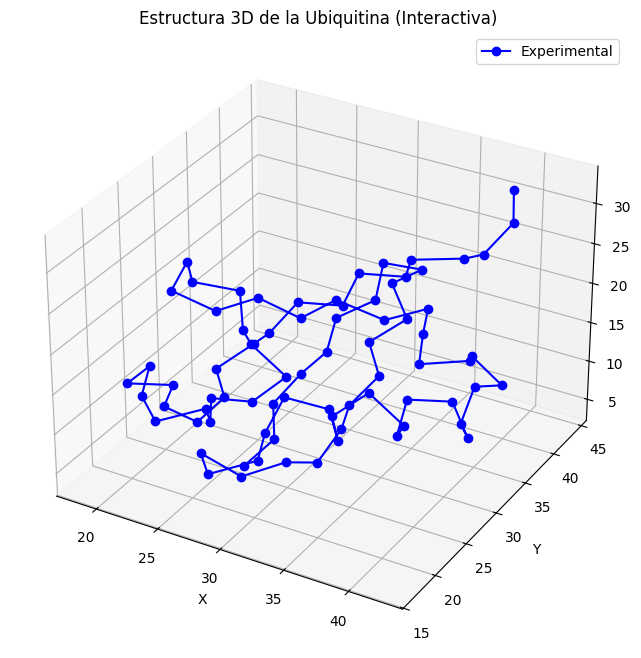

In [14]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
from Bio.PDB import PDBParser

# Cargar la estructura experimental
parser = PDBParser(QUIET=True)
estructura = parser.get_structure("Ubiquitina", "./pdb_files/pdb1ubq.ent")

# Extraer coordenadas de carbonos alfa (CA)
ca_atoms = [res["CA"].get_coord() for res in estructura[0]["A"] if "CA" in res]
ca_atoms = np.array(ca_atoms)

# Crear figura interactiva
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Graficar la estructura con interacción
ax.plot(ca_atoms[:, 0], ca_atoms[:, 1], ca_atoms[:, 2], marker='o', linestyle='-', color='b', label="Experimental")

# Etiquetas y título
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")
ax.set_title("Estructura 3D de la Ubiquitina (Interactiva)")
ax.legend()

# Hacer que la figura sea interactiva
plt.ion()  # Activa el modo interactivo
plt.show()




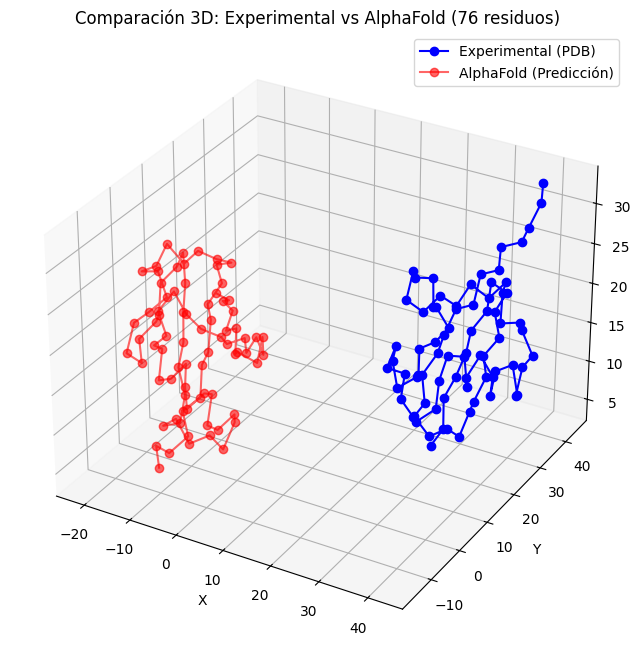

In [21]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
from Bio.PDB import PDBParser

# Función para cargar una estructura PDB y extraer solo los primeros 76 residuos
def cargar_estructura_filtrada(pdb_path, max_residuos=76):
    parser = PDBParser(QUIET=True)
    estructura = parser.get_structure("Proteina", pdb_path)
    
    ca_atoms = []
    for i, res in enumerate(estructura[0]["A"]):  # Usamos la cadena A
        if "CA" in res and i < max_residuos:
            ca_atoms.append(res["CA"].get_coord())
    
    return np.array(ca_atoms)

# Cargar la estructura experimental (PDB oficial) desde Documentos
ca_exp = cargar_estructura_filtrada("/home/antonio-tapia/Documentos/pdb_files/pdb1ubq.ent")

# Cargar la estructura de AlphaFold (solo primeros 76 residuos) desde Documentos
ca_af = cargar_estructura_filtrada("/home/antonio-tapia/Documentos/alphafold_models/P0CG47.pdb")

# Crear figura interactiva
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Graficar estructura experimental en azul
ax.plot(ca_exp[:, 0], ca_exp[:, 1], ca_exp[:, 2], marker='o', linestyle='-', color='b', label="Experimental (PDB)")

# Graficar estructura AlphaFold en rojo
ax.plot(ca_af[:, 0], ca_af[:, 1], ca_af[:, 2], marker='o', linestyle='-', color='r', alpha=0.6, label="AlphaFold (Predicción)")

# Etiquetas y título
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")
ax.set_title("Comparación 3D: Experimental vs AlphaFold (76 residuos)")
ax.legend()

# Hacer la visualización interactiva
plt.ion()
plt.show()


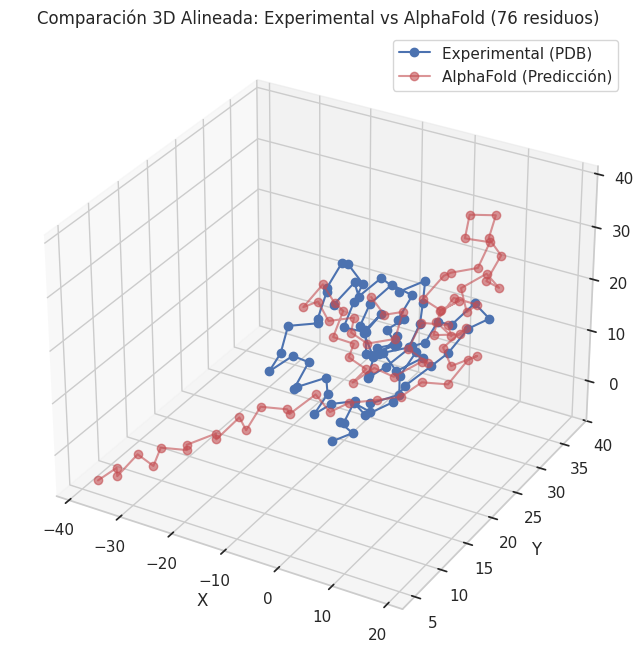

RMSD entre estructuras: 17.452 Å


In [31]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
from Bio.PDB import PDBParser, Superimposer

# Función para cargar una estructura PDB y extraer solo los primeros 76 residuos
def cargar_estructura_filtrada(pdb_path, max_residuos=76):
    parser = PDBParser(QUIET=True)
    estructura = parser.get_structure("Proteina", pdb_path)
    
    ca_atoms = []
    for i, res in enumerate(estructura[0]["A"]):  # Usamos la cadena A
        if "CA" in res and i < max_residuos:
            ca_atoms.append(res["CA"])
    
    return ca_atoms




# Cargar la estructura experimental (PDB oficial)
ca_exp = cargar_estructura_filtrada("/home/antonio-tapia/pdb_files/pdb1lyz.ent")

# Cargar la estructura de AlphaFold (solo primeros 76 residuos)
ca_af = cargar_estructura_filtrada("/home/antonio-tapia/alphafold_models/P00698.pdb")

"""
# Cargar la estructura experimental (PDB oficial)
ca_exp = cargar_estructura_filtrada("/home/antonio-tapia/Documentos/pdb_files/pdb1ubq.ent")

# Cargar la estructura de AlphaFold (solo primeros 76 residuos)
ca_af = cargar_estructura_filtrada("/home/antonio-tapia/Documentos/alphafold_models/P0CG47.pdb")

"""

# Alinear estructuras con Superimposer de BioPython
super_imposer = Superimposer()
super_imposer.set_atoms(ca_exp, ca_af)
super_imposer.apply(ca_af)  # Aplica la transformación a la predicción de AlphaFold

# Convertir a coordenadas NumPy para graficar
ca_exp_coords = np.array([atom.get_coord() for atom in ca_exp])
ca_af_coords = np.array([atom.get_coord() for atom in ca_af])

# Crear figura interactiva
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Graficar estructura experimental en azul
ax.plot(ca_exp_coords[:, 0], ca_exp_coords[:, 1], ca_exp_coords[:, 2], marker='o', linestyle='-', color='b', label="Experimental (PDB)")

# Graficar estructura AlphaFold alineada en rojo
ax.plot(ca_af_coords[:, 0], ca_af_coords[:, 1], ca_af_coords[:, 2], marker='o', linestyle='-', color='r', alpha=0.6, label="AlphaFold (Predicción)")

# Etiquetas y título
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")
ax.set_title("Comparación 3D Alineada: Experimental vs AlphaFold (76 residuos)")
ax.legend()

# Hacer la visualización interactiva
plt.ion()
plt.show()

# Mostrar el RMSD (desviación estructural)
print(f"RMSD entre estructuras: {super_imposer.rms:.3f} Å")


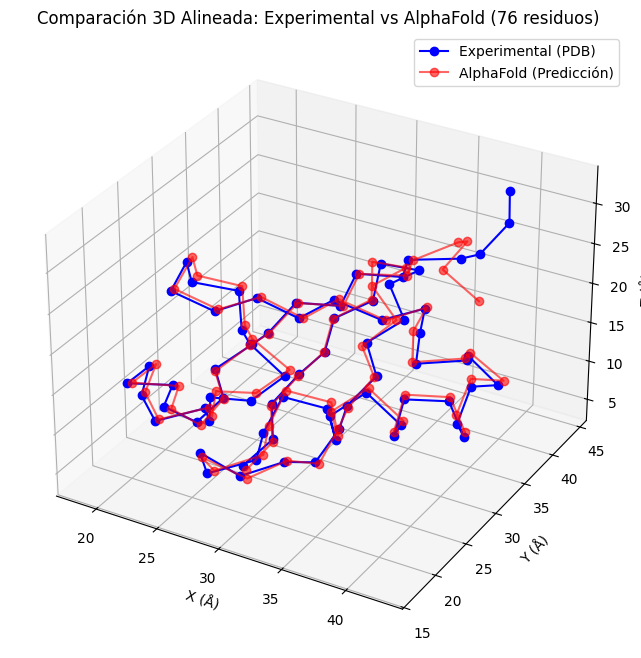

RMSD entre estructuras: 1.681 Å


In [23]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
from Bio.PDB import PDBParser, Superimposer

# Función para cargar una estructura PDB y extraer carbonos alfa (CA) de una cadena específica
def cargar_ca(pdb_path, chain_id="A", max_residuos=None):
    parser = PDBParser(QUIET=True)
    estructura = parser.get_structure("Proteina", pdb_path)
    
    ca_atoms = []
    for i, res in enumerate(estructura[0][chain_id]):  # Usamos la cadena especificada
        if "CA" in res:
            if max_residuos is not None and i >= max_residuos:
                break
            ca_atoms.append(res["CA"])
    
    return ca_atoms

# Función para alinear dos estructuras usando Superimposer
def alinear_estructuras(ca_exp, ca_af):
    super_imposer = Superimposer()
    super_imposer.set_atoms(ca_exp, ca_af)
    super_imposer.apply(ca_af)  # Aplica la transformación a la predicción de AlphaFold
    return super_imposer

# Función para graficar las estructuras alineadas
def graficar_estructuras(ca_exp, ca_af, title="Comparación 3D Alineada"):
    # Convertir a coordenadas NumPy para graficar
    ca_exp_coords = np.array([atom.get_coord() for atom in ca_exp])
    ca_af_coords = np.array([atom.get_coord() for atom in ca_af])

    # Crear figura interactiva
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')

    # Graficar estructura experimental en azul
    ax.plot(ca_exp_coords[:, 0], ca_exp_coords[:, 1], ca_exp_coords[:, 2], 
            marker='o', linestyle='-', color='b', label="Experimental (PDB)")

    # Graficar estructura AlphaFold alineada en rojo
    ax.plot(ca_af_coords[:, 0], ca_af_coords[:, 1], ca_af_coords[:, 2], 
            marker='o', linestyle='-', color='r', alpha=0.6, label="AlphaFold (Predicción)")

    # Etiquetas y título
    ax.set_xlabel("X (Å)")
    ax.set_ylabel("Y (Å)")
    ax.set_zlabel("Z (Å)")
    ax.set_title(title)
    ax.legend()

    # Hacer la visualización interactiva
    plt.ion()
    plt.show()

# Cargar las estructuras
pdb_exp_path = "/home/antonio-tapia/Documentos/pdb_files/pdb1ubq.ent"
pdb_af_path = "/home/antonio-tapia/Documentos/alphafold_models/P0CG47.pdb"

# Cargar solo los primeros 76 residuos (o menos si una estructura es más corta)
ca_exp = cargar_ca(pdb_exp_path, chain_id="A", max_residuos=76)
ca_af = cargar_ca(pdb_af_path, chain_id="A", max_residuos=76)

# Alinear estructuras
super_imposer = alinear_estructuras(ca_exp, ca_af)

# Graficar estructuras alineadas
graficar_estructuras(ca_exp, ca_af, title="Comparación 3D Alineada: Experimental vs AlphaFold (76 residuos)")

# Mostrar el RMSD (desviación estructural)
print(f"RMSD entre estructuras: {super_imposer.rms:.3f} Å")

In [24]:
                                                                                                import numpy as np
import plotly.graph_objects as go
from Bio.PDB import PDBParser, Superimposer

# Función para cargar una estructura PDB y extraer carbonos alfa (CA) de una cadena específica
def cargar_ca(pdb_path, chain_id="A", max_residuos=None):
    try:
        parser = PDBParser(QUIET=True)
        estructura = parser.get_structure("Proteina", pdb_path)
        
        # Verificar si la cadena existe
        if chain_id not in [chain.id for chain in estructura[0]]:
            raise ValueError(f"La cadena {chain_id} no existe en el archivo {pdb_path}.")
        
        ca_atoms = []
        for i, res in enumerate(estructura[0][chain_id]):  # Usamos la cadena especificada
            if "CA" in res:
                if max_residuos is not None and i >= max_residuos:
                    break
                ca_atoms.append(res["CA"])
        
        if not ca_atoms:
            raise ValueError(f"No se encontraron carbonos alfa (CA) en la cadena {chain_id} del archivo {pdb_path}.")
        
        return ca_atoms
    except Exception as e:
        print(f"Error al cargar el archivo {pdb_path}: {e}")
        return None

# Función para alinear dos estructuras usando Superimposer
def alinear_estructuras(ca_exp, ca_af):
    try:
        super_imposer = Superimposer()
        super_imposer.set_atoms(ca_exp, ca_af)
        super_imposer.apply(ca_af)  # Aplica la transformación a la predicción de AlphaFold
        return super_imposer
    except Exception as e:
        print(f"Error al alinear las estructuras: {e}")
        return None

# Función para graficar las estructuras alineadas con plotly
def graficar_estructuras(ca_exp, ca_af, title="Comparación 3D Alineada"):
    try:
        # Convertir a coordenadas NumPy para graficar
        ca_exp_coords = np.array([atom.get_coord() for atom in ca_exp])
        ca_af_coords = np.array([atom.get_coord() for atom in ca_af])

        # Crear gráfico 3D con plotly
        fig = go.Figure()

        # Graficar estructura experimental en azul
        fig.add_trace(go.Scatter3d(
            x=ca_exp_coords[:, 0], y=ca_exp_coords[:, 1], z=ca_exp_coords[:, 2],
            mode='lines+markers',
            marker=dict(size=4, color='blue'),
            line=dict(color='blue', width=2),
            name="Experimental (PDB)"
        ))

        # Graficar estructura AlphaFold alineada en rojo
        fig.add_trace(go.Scatter3d(
            x=ca_af_coords[:, 0], y=ca_af_coords[:, 1], z=ca_af_coords[:, 2],
            mode='lines+markers',
            marker=dict(size=4, color='red'),
            line=dict(color='red', width=2),
            name="AlphaFold (Predicción)"
        ))

        # Configuración del gráfico
        fig.update_layout(
            scene=dict(
                xaxis_title='X (Å)',
                yaxis_title='Y (Å)',
                zaxis_title='Z (Å)',
            ),
            title=title,
            margin=dict(l=0, r=0, b=0, t=30)  # Ajustar márgenes
        )

        # Mostrar el gráfico interactivo
        fig.show()
    except Exception as e:
        print(f"Error al graficar las estructuras: {e}")

# Cargar las estructuras
pdb_exp_path = "/home/antonio-tapia/Documentos/pdb_files/pdb1ubq.ent"
pdb_af_path = "/home/antonio-tapia/Documentos/alphafold_models/P0CG47.pdb"

# Cargar solo los primeros 76 residuos (o menos si una estructura es más corta)
ca_exp = cargar_ca(pdb_exp_path, chain_id="A", max_residuos=76)
ca_af = cargar_ca(pdb_af_path, chain_id="A", max_residuos=76)

# Verificar que ambas estructuras se cargaron correctamente
if ca_exp is not None and ca_af is not None:
    # Alinear estructuras
    super_imposer = alinear_estructuras(ca_exp, ca_af)
    
    if super_imposer is not None:
        # Graficar estructuras alineadas
        graficar_estructuras(ca_exp, ca_af, title="Comparación 3D Alineada: Experimental vs AlphaFold (76 residuos)")
        
        # Mostrar el RMSD (desviación estructural)
        print(f"RMSD entre estructuras: {super_imposer.rms:.3f} Å")

RMSD entre estructuras: 1.681 Å


In [1]:
import numpy as np
import plotly.graph_objects as go
from Bio.PDB import PDBParser, Superimposer

# Función para cargar una estructura PDB y extraer carbonos alfa (CA) de una cadena específica
def cargar_ca(pdb_path, chain_id="A", max_residuos=None):
    try:
        parser = PDBParser(QUIET=True)
        estructura = parser.get_structure("Proteina", pdb_path)
        
        # Verificar si la cadena existe
        if chain_id not in [chain.id for chain in estructura[0]]:
            raise ValueError(f"La cadena {chain_id} no existe en el archivo {pdb_path}.")
        
        ca_atoms = []
        for i, res in enumerate(estructura[0][chain_id]):  # Usamos la cadena especificada
            if "CA" in res:
                if max_residuos is not None and i >= max_residuos:
                    break
                ca_atoms.append(res["CA"])
        
        if not ca_atoms:
            raise ValueError(f"No se encontraron carbonos alfa (CA) en la cadena {chain_id} del archivo {pdb_path}.")
        
        return ca_atoms
    except Exception as e:
        print(f"Error al cargar el archivo {pdb_path}: {e}")
        return None

# Función para alinear dos estructuras usando Superimposer y calcular RMSD por residuo
def alinear_estructuras(ca_exp, ca_af):
    try:
        super_imposer = Superimposer()
        super_imposer.set_atoms(ca_exp, ca_af)
        super_imposer.apply(ca_af)  # Aplica la transformación a la predicción de AlphaFold
        
        # Calcular RMSD por residuo
        rmsd_residuos = np.linalg.norm(
            np.array([atom1.get_coord() for atom1 in ca_exp]) - 
            np.array([atom2.get_coord() for atom2 in ca_af]),
            axis=1
        )

        return super_imposer, rmsd_residuos
    except Exception as e:
        print(f"Error al alinear las estructuras: {e}")
        return None, None

# Función para graficar con coloración según desviación estructural
def graficar_estructuras_coloreadas(ca_exp, ca_af, rmsd_residuos, title="Comparación 3D Alineada"):
    try:
        # Convertir a coordenadas NumPy para graficar
        ca_exp_coords = np.array([atom.get_coord() for atom in ca_exp])
        ca_af_coords = np.array([atom.get_coord() for atom in ca_af])

        # Normalizar los valores de RMSD para que los colores vayan de azul (baja desviación) a rojo (alta desviación)
        colores = np.interp(rmsd_residuos, (rmsd_residuos.min(), rmsd_residuos.max()), (0, 1))

        # Crear gráfico 3D con plotly
        fig = go.Figure()

        # Graficar estructura experimental en azul
        fig.add_trace(go.Scatter3d(
            x=ca_exp_coords[:, 0], y=ca_exp_coords[:, 1], z=ca_exp_coords[:, 2],
            mode='lines+markers',
            marker=dict(size=4, color='blue'),
            line=dict(color='blue', width=2),
            name="Experimental (PDB)"
        ))

        # Graficar estructura AlphaFold con colores según RMSD
        fig.add_trace(go.Scatter3d(
            x=ca_af_coords[:, 0], y=ca_af_coords[:, 1], z=ca_af_coords[:, 2],
            mode='lines+markers',
            marker=dict(size=4, color=colores, colorscale='Bluered', cmin=0, cmax=1),
            line=dict(color='red', width=2),
            name="AlphaFold (Predicción)"
        ))

        # Configuración del gráfico
        fig.update_layout(
            scene=dict(
                xaxis_title='X (Å)',
                yaxis_title='Y (Å)',
                zaxis_title='Z (Å)',
            ),
            title=f"{title}<br>RMSD Global: {rmsd_residuos.mean():.3f} Å",
            margin=dict(l=0, r=0, b=0, t=50)  # Ajustar márgenes
        )

        # Mostrar el gráfico interactivo
        fig.show()
    except Exception as e:
        print(f"Error al graficar las estructuras: {e}")

# Cargar las estructuras
pdb_exp_path = "/home/antonio-tapia/Documentos/pdb_files/pdb1ubq.ent"
pdb_af_path = "/home/antonio-tapia/Documentos/alphafold_models/P0CG47.pdb"

# Cargar solo los primeros 76 residuos (o menos si una estructura es más corta)
ca_exp = cargar_ca(pdb_exp_path, chain_id="A", max_residuos=76)
ca_af = cargar_ca(pdb_af_path, chain_id="A", max_residuos=76)

# Verificar que ambas estructuras se cargaron correctamente
if ca_exp is not None and ca_af is not None:
    # Alinear estructuras y calcular RMSD por residuo
    super_imposer, rmsd_residuos = alinear_estructuras(ca_exp, ca_af)
    
    if super_imposer is not None:
        # Graficar estructuras alineadas con colores por desviación
        graficar_estructuras_coloreadas(ca_exp, ca_af, rmsd_residuos,
                                        title="Comparación 3D Alineada con Color por RMSD")
        
        # Mostrar el RMSD global
        print(f"RMSD entre estructuras: {super_imposer.rms:.3f} Å")


RMSD entre estructuras: 1.681 Å


In [2]:
import numpy as np
import plotly.graph_objects as go
from Bio.PDB import PDBParser, Superimposer

# Función para cargar una estructura PDB y extraer carbonos alfa (CA) de una cadena específica
def cargar_ca(pdb_path, chain_id="A", max_residuos=None):
    try:
        parser = PDBParser(QUIET=True)
        estructura = parser.get_structure("Proteina", pdb_path)
        
        # Verificar si la cadena existe
        if chain_id not in [chain.id for chain in estructura[0]]:
            raise ValueError(f"La cadena {chain_id} no existe en el archivo {pdb_path}.")
        
        ca_atoms = []
        for i, res in enumerate(estructura[0][chain_id]):  # Usamos la cadena especificada
            if "CA" in res:
                if max_residuos is not None and i >= max_residuos:
                    break
                ca_atoms.append(res["CA"])
        
        if not ca_atoms:
            raise ValueError(f"No se encontraron carbonos alfa (CA) en la cadena {chain_id} del archivo {pdb_path}.")
        
        return ca_atoms
    except Exception as e:
        print(f"Error al cargar el archivo {pdb_path}: {e}")
        return None

# Función para alinear dos estructuras usando Superimposer y calcular RMSD por residuo
def alinear_estructuras(ca_exp, ca_af):
    try:
        super_imposer = Superimposer()
        super_imposer.set_atoms(ca_exp, ca_af)
        super_imposer.apply(ca_af)  # Aplica la transformación a la predicción de AlphaFold
        
        # Calcular RMSD por residuo
        rmsd_residuos = np.linalg.norm(
            np.array([atom1.get_coord() for atom1 in ca_exp]) - 
            np.array([atom2.get_coord() for atom2 in ca_af]),
            axis=1
        )

        return super_imposer, rmsd_residuos
    except Exception as e:
        print(f"Error al alinear las estructuras: {e}")
        return None, None

# Función para graficar con coloración según desviación estructural
def graficar_estructuras_coloreadas(ca_exp, ca_af, rmsd_residuos, title="Comparación 3D Alineada"):
    try:
        # Convertir a coordenadas NumPy para graficar
        ca_exp_coords = np.array([atom.get_coord() for atom in ca_exp])
        ca_af_coords = np.array([atom.get_coord() for atom in ca_af])

        # Normalizar los valores de RMSD para que los colores vayan de azul (baja desviación) a rojo (alta desviación)
        colores = np.interp(rmsd_residuos, (0, 5), (0, 1))  # RMSD entre 0 y 5 Å

        # Crear gráfico 3D con plotly
        fig = go.Figure()

        # Graficar estructura experimental en azul
        fig.add_trace(go.Scatter3d(
            x=ca_exp_coords[:, 0], y=ca_exp_coords[:, 1], z=ca_exp_coords[:, 2],
            mode='lines+markers',
            marker=dict(size=4, color='blue'),
            line=dict(color='blue', width=2),
            name="Experimental (PDB)"
        ))

        # Graficar estructura AlphaFold con colores según RMSD
        fig.add_trace(go.Scatter3d(
            x=ca_af_coords[:, 0], y=ca_af_coords[:, 1], z=ca_af_coords[:, 2],
            mode='lines+markers',
            marker=dict(size=4, color=colores, colorscale='Bluered', cmin=0, cmax=1,
                        colorbar=dict(title="RMSD (Å)", thickness=20, len=0.5)),
            line=dict(color='red', width=2),
            name="AlphaFold (Predicción)"
        ))

        # Configuración del gráfico
        fig.update_layout(
            scene=dict(
                xaxis_title='X (Å)',
                yaxis_title='Y (Å)',
                zaxis_title='Z (Å)',
            ),
            title=f"{title}<br>RMSD Global: {rmsd_residuos.mean():.3f} Å",
            margin=dict(l=0, r=0, b=0, t=50)  # Ajustar márgenes
        )

        # Mostrar el gráfico interactivo
        fig.show()

        # Exportar el gráfico como HTML
        fig.write_html("comparacion_3d.html")
    except Exception as e:
        print(f"Error al graficar las estructuras: {e}")

# Cargar las estructuras
pdb_exp_path = "/home/antonio-tapia/Documentos/pdb_files/pdb1ubq.ent"
pdb_af_path = "/home/antonio-tapia/Documentos/alphafold_models/P0CG47.pdb"

# Cargar solo los primeros 76 residuos (o menos si una estructura es más corta)
ca_exp = cargar_ca(pdb_exp_path, chain_id="A", max_residuos=76)
ca_af = cargar_ca(pdb_af_path, chain_id="A", max_residuos=76)

# Verificar que ambas estructuras se cargaron correctamente
if ca_exp is not None and ca_af is not None:
    # Alinear estructuras y calcular RMSD por residuo
    super_imposer, rmsd_residuos = alinear_estructuras(ca_exp, ca_af)
    
    if super_imposer is not None:
        # Graficar estructuras alineadas con colores por desviación
        graficar_estructuras_coloreadas(ca_exp, ca_af, rmsd_residuos,
                                        title="Comparación 3D Alineada con Color por RMSD")
        
        # Mostrar el RMSD global
        print(f"RMSD entre estructuras: {super_imposer.rms:.3f} Å")

RMSD entre estructuras: 1.681 Å


In [3]:
import numpy as np
import plotly.graph_objects as go
from Bio.PDB import PDBParser, Superimposer

# Función para cargar una estructura PDB y extraer carbonos alfa (CA) de una cadena específica
def cargar_ca(pdb_path, chain_id="A", max_residuos=None):
    parser = PDBParser(QUIET=True)
    estructura = parser.get_structure("Proteina", pdb_path)
    
    # Verificar si la cadena existe
    if chain_id not in [chain.id for chain in estructura[0]]:
        raise ValueError(f"La cadena {chain_id} no existe en el archivo {pdb_path}.")
    
    ca_atoms = []
    for i, res in enumerate(estructura[0][chain_id]):  # Usamos la cadena especificada
        if "CA" in res:
            if max_residuos is not None and i >= max_residuos:
                break
            ca_atoms.append(res["CA"])
    
    if not ca_atoms:
        raise ValueError(f"No se encontraron carbonos alfa (CA) en la cadena {chain_id} del archivo {pdb_path}.")
    
    return ca_atoms

# Función para alinear estructuras y calcular RMSD por residuo
def alinear_estructuras(ca_exp, ca_af):
    super_imposer = Superimposer()
    super_imposer.set_atoms(ca_exp, ca_af)
    super_imposer.apply(ca_af)  # Aplica la transformación a la predicción de AlphaFold
    
    # Calcular RMSD por residuo
    rmsd_residuos = np.linalg.norm(
        np.array([atom1.get_coord() for atom1 in ca_exp]) - 
        np.array([atom2.get_coord() for atom2 in ca_af]),
        axis=1
    )
    
    return super_imposer, rmsd_residuos

# Función para graficar con coloración según desviación estructural y exportar HTML
def graficar_estructuras_coloreadas(ca_exp, ca_af, rmsd_residuos, title="Comparación 3D Alineada"):
    # Convertir a coordenadas NumPy para graficar
    ca_exp_coords = np.array([atom.get_coord() for atom in ca_exp])
    ca_af_coords = np.array([atom.get_coord() for atom in ca_af])

    # Normalizar valores de RMSD (ampliando diferencias entre 0 y 5 Å)
    colores = np.interp(rmsd_residuos, (0, 5), (0, 1))

    # Crear gráfico 3D con plotly
    fig = go.Figure()

    # Graficar estructura experimental en azul
    fig.add_trace(go.Scatter3d(
        x=ca_exp_coords[:, 0], y=ca_exp_coords[:, 1], z=ca_exp_coords[:, 2],
        mode='lines+markers',
        marker=dict(size=4, color='blue'),
        line=dict(color='blue', width=2),
        name="Experimental (PDB)"
    ))

    # Graficar estructura AlphaFold con escala de colores mejorada
    fig.add_trace(go.Scatter3d(
        x=ca_af_coords[:, 0], y=ca_af_coords[:, 1], z=ca_af_coords[:, 2],
        mode='lines+markers',
        marker=dict(size=6, color=colores, colorscale='Turbo', cmin=0, cmax=1,
                    colorbar=dict(title="RMSD (Å)", thickness=20, len=0.5)),
        line=dict(color='red', width=2),
        name="AlphaFold (Predicción)"
    ))

    # Configuración del gráfico
    fig.update_layout(
        scene=dict(
            xaxis_title='X (Å)',
            yaxis_title='Y (Å)',
            zaxis_title='Z (Å)',
        ),
        title=f"{title}<br>RMSD Global: {rmsd_residuos.mean():.3f} Å",
        margin=dict(l=0, r=0, b=0, t=50)  # Ajustar márgenes
    )

    # Mostrar el gráfico interactivo
    fig.show()

    # Exportar el gráfico como HTML interactivo
    fig.write_html("comparacion_3d.html")

# Cargar las estructuras
pdb_exp_path = "/home/antonio-tapia/Documentos/pdb_files/pdb1ubq.ent"
pdb_af_path = "/home/antonio-tapia/Documentos/alphafold_models/P0CG47.pdb"

# Cargar solo los primeros 76 residuos (o menos si una estructura es más corta)
ca_exp = cargar_ca(pdb_exp_path, chain_id="A", max_residuos=76)
ca_af = cargar_ca(pdb_af_path, chain_id="A", max_residuos=76)

# Verificar que ambas estructuras se cargaron correctamente
if ca_exp is not None and ca_af is not None:
    # Alinear estructuras y calcular RMSD por residuo
    super_imposer, rmsd_residuos = alinear_estructuras(ca_exp, ca_af)
    
    if super_imposer is not None:
        # Graficar estructuras alineadas con colores por desviación
        graficar_estructuras_coloreadas(ca_exp, ca_af, rmsd_residuos,
                                        title="Comparación 3D Alineada con Color por RMSD")
        
        # Mostrar el RMSD global
        print(f"RMSD entre estructuras: {super_imposer.rms:.3f} Å")


RMSD entre estructuras: 1.681 Å


In [4]:
import numpy as np
import plotly.graph_objects as go
from Bio.PDB import PDBParser, Superimposer

# Función para cargar una estructura PDB y extraer carbonos alfa (CA) de una cadena específica
def cargar_ca(pdb_path, chain_id="A", max_residuos=None):
    parser = PDBParser(QUIET=True)
    estructura = parser.get_structure("Proteina", pdb_path)
    
    # Verificar si la cadena existe
    if chain_id not in [chain.id for chain in estructura[0]]:
        raise ValueError(f"La cadena {chain_id} no existe en el archivo {pdb_path}.")
    
    ca_atoms = []
    for i, res in enumerate(estructura[0][chain_id]):  # Usamos la cadena especificada
        if "CA" in res:
            if max_residuos is not None and i >= max_residuos:
                break
            ca_atoms.append(res["CA"])
    
    if not ca_atoms:
        raise ValueError(f"No se encontraron carbonos alfa (CA) en la cadena {chain_id} del archivo {pdb_path}.")
    
    return ca_atoms

# Función para alinear estructuras y calcular RMSD por residuo
def alinear_estructuras(ca_exp, ca_af):
    super_imposer = Superimposer()
    super_imposer.set_atoms(ca_exp, ca_af)
    super_imposer.apply(ca_af)  # Aplica la transformación a la predicción de AlphaFold
    
    # Calcular RMSD por residuo
    rmsd_residuos = np.linalg.norm(
        np.array([atom1.get_coord() for atom1 in ca_exp]) - 
        np.array([atom2.get_coord() for atom2 in ca_af]),
        axis=1
    )
    
    return super_imposer, rmsd_residuos

# Función para graficar con coloración según desviación estructural y exportar HTML
def graficar_estructuras_coloreadas(ca_exp, ca_af, rmsd_residuos, rmsd_global, title="Comparación 3D Alineada"):
    # Convertir a coordenadas NumPy para graficar
    ca_exp_coords = np.array([atom.get_coord() for atom in ca_exp])
    ca_af_coords = np.array([atom.get_coord() for atom in ca_af])

    # Normalizar valores de RMSD (ampliando diferencias entre 0 y 5 Å)
    colores = np.interp(rmsd_residuos, (0, 5), (0, 1))

    # Crear gráfico 3D con plotly
    fig = go.Figure()

    # Graficar estructura experimental en azul
    fig.add_trace(go.Scatter3d(
        x=ca_exp_coords[:, 0], y=ca_exp_coords[:, 1], z=ca_exp_coords[:, 2],
        mode='lines+markers',
        marker=dict(size=4, color='blue'),
        line=dict(color='blue', width=2),
        name="Experimental (PDB)"
    ))

    # Graficar estructura AlphaFold con escala de colores mejorada
    fig.add_trace(go.Scatter3d(
        x=ca_af_coords[:, 0], y=ca_af_coords[:, 1], z=ca_af_coords[:, 2],
        mode='lines+markers',
        marker=dict(size=6, color=colores, colorscale='Turbo', cmin=0, cmax=1,
                    colorbar=dict(title="RMSD (Å)", thickness=20, len=0.5)),
        line=dict(color='red', width=2),
        name="AlphaFold (Predicción)"
    ))

    # Configuración del gráfico
    fig.update_layout(
        scene=dict(
            xaxis_title='X (Å)',
            yaxis_title='Y (Å)',
            zaxis_title='Z (Å)',
        ),
        title=f"{title}<br>RMSD Global: {rmsd_global:.3f} Å",
        margin=dict(l=0, r=0, b=0, t=50)  # Ajustar márgenes
    )

    # Mostrar el gráfico interactivo
    fig.show()

    # Exportar el gráfico como HTML interactivo
    fig.write_html("comparacion_3d.html")

# Cargar las estructuras
pdb_exp_path = "/home/antonio-tapia/Documentos/pdb_files/pdb1ubq.ent"
pdb_af_path = "/home/antonio-tapia/Documentos/alphafold_models/P0CG47.pdb"

# Cargar solo los primeros 76 residuos (o menos si una estructura es más corta)
ca_exp = cargar_ca(pdb_exp_path, chain_id="A", max_residuos=76)
ca_af = cargar_ca(pdb_af_path, chain_id="A", max_residuos=76)

# Verificar que ambas estructuras se cargaron correctamente
if ca_exp is not None and ca_af is not None:
    # Alinear estructuras y calcular RMSD por residuo
    super_imposer, rmsd_residuos = alinear_estructuras(ca_exp, ca_af)
    
    if super_imposer is not None:
        # Graficar estructuras alineadas con colores por desviación
        graficar_estructuras_coloreadas(ca_exp, ca_af, rmsd_residuos, super_imposer.rms,
                                        title="Comparación 3D Alineada con Color por RMSD")
        
        # Mostrar el RMSD global
        print(f"RMSD entre estructuras: {super_imposer.rms:.3f} Å")

RMSD entre estructuras: 1.681 Å


In [5]:
import numpy as np
import plotly.graph_objects as go
from Bio.PDB import PDBParser, Superimposer

# Función para cargar una estructura PDB y extraer carbonos alfa (CA) de una cadena específica
def cargar_ca(pdb_path, chain_id="A", max_residuos=None):
    parser = PDBParser(QUIET=True)
    estructura = parser.get_structure("Proteina", pdb_path)
    
    # Verificar si la cadena existe
    if chain_id not in [chain.id for chain in estructura[0]]:
        raise ValueError(f"La cadena {chain_id} no existe en el archivo {pdb_path}.")
    
    ca_atoms = []
    for i, res in enumerate(estructura[0][chain_id]):  # Usamos la cadena especificada
        if "CA" in res:
            if max_residuos is not None and i >= max_residuos:
                break
            ca_atoms.append(res["CA"])
    
    if not ca_atoms:
        raise ValueError(f"No se encontraron carbonos alfa (CA) en la cadena {chain_id} del archivo {pdb_path}.")
    
    return ca_atoms

# Función para alinear estructuras y calcular RMSD por residuo
def alinear_estructuras(ca_exp, ca_af):
    super_imposer = Superimposer()
    super_imposer.set_atoms(ca_exp, ca_af)
    super_imposer.apply(ca_af)  # Aplica la transformación a la predicción de AlphaFold
    
    # Calcular RMSD por residuo
    rmsd_residuos = np.linalg.norm(
        np.array([atom1.get_coord() for atom1 in ca_exp]) - 
        np.array([atom2.get_coord() for atom2 in ca_af]),
        axis=1
    )
    
    return super_imposer, rmsd_residuos

# Función para graficar con coloración según desviación estructural y exportar HTML
def graficar_estructuras_coloreadas(ca_exp, ca_af, rmsd_residuos, rmsd_global, title="Comparación 3D Alineada"):
    # Convertir a coordenadas NumPy para graficar
    ca_exp_coords = np.array([atom.get_coord() for atom in ca_exp])
    ca_af_coords = np.array([atom.get_coord() for atom in ca_af])

    # Definir el rango de colores (0 a 5 Å)
    colores = np.clip(rmsd_residuos, 0, 5)  # Limitar el RMSD a un máximo de 5 Å

    # Crear gráfico 3D con plotly
    fig = go.Figure()

    # Graficar estructura experimental en azul
    fig.add_trace(go.Scatter3d(
        x=ca_exp_coords[:, 0], y=ca_exp_coords[:, 1], z=ca_exp_coords[:, 2],
        mode='lines+markers',
        marker=dict(size=4, color='blue'),
        line=dict(color='blue', width=2),
        name="Experimental (PDB)"
    ))

    # Graficar estructura AlphaFold con escala de colores mejorada
    fig.add_trace(go.Scatter3d(
        x=ca_af_coords[:, 0], y=ca_af_coords[:, 1], z=ca_af_coords[:, 2],
        mode='lines+markers',
        marker=dict(size=6, color=colores, colorscale='Viridis', cmin=0, cmax=5,
                    colorbar=dict(title="RMSD por residuo (Å)", thickness=20, len=0.5)),
        line=dict(color='red', width=2),
        name="AlphaFold (Predicción)"
    ))

    # Configuración del gráfico
    fig.update_layout(
        scene=dict(
            xaxis_title='X (Å)',
            yaxis_title='Y (Å)',
            zaxis_title='Z (Å)',
        ),
        title=f"{title}<br>RMSD Global: {rmsd_global:.3f} Å",
        margin=dict(l=0, r=0, b=0, t=50)  # Ajustar márgenes
    )

    # Mostrar el gráfico interactivo
    fig.show()

    # Exportar el gráfico como HTML interactivo
    fig.write_html("comparacion_3d.html")

# Cargar las estructuras
pdb_exp_path = "/home/antonio-tapia/Documentos/pdb_files/pdb1ubq.ent"
pdb_af_path = "/home/antonio-tapia/Documentos/alphafold_models/P0CG47.pdb"

# Cargar solo los primeros 76 residuos (o menos si una estructura es más corta)
ca_exp = cargar_ca(pdb_exp_path, chain_id="A", max_residuos=76)
ca_af = cargar_ca(pdb_af_path, chain_id="A", max_residuos=76)

# Verificar que ambas estructuras se cargaron correctamente
if ca_exp is not None and ca_af is not None:
    # Alinear estructuras y calcular RMSD por residuo
    super_imposer, rmsd_residuos = alinear_estructuras(ca_exp, ca_af)
    
    if super_imposer is not None:
        # Graficar estructuras alineadas con colores por desviación
        graficar_estructuras_coloreadas(ca_exp, ca_af, rmsd_residuos, super_imposer.rms,
                                        title="Comparación 3D Alineada con Color por RMSD")
        
        # Mostrar el RMSD global
        print(f"RMSD entre estructuras: {super_imposer.rms:.3f} Å")

RMSD entre estructuras: 1.681 Å


In [6]:
import numpy as np
import plotly.graph_objects as go
from Bio.PDB import PDBParser, Superimposer

# Función para cargar una estructura PDB y extraer carbonos alfa (CA) de una cadena específica
def cargar_ca(pdb_path, chain_id="A", max_residuos=None):
    parser = PDBParser(QUIET=True)
    estructura = parser.get_structure("Proteina", pdb_path)
    
    # Verificar si la cadena existe
    if chain_id not in [chain.id for chain in estructura[0]]:
        raise ValueError(f"La cadena {chain_id} no existe en el archivo {pdb_path}.")
    
    ca_atoms = []
    for i, res in enumerate(estructura[0][chain_id]):  # Usamos la cadena especificada
        if "CA" in res:
            if max_residuos is not None and i >= max_residuos:
                break
            ca_atoms.append(res["CA"])
    
    if not ca_atoms:
        raise ValueError(f"No se encontraron carbonos alfa (CA) en la cadena {chain_id} del archivo {pdb_path}.")
    
    return ca_atoms

# Función para alinear estructuras y calcular RMSD por residuo
def alinear_estructuras(ca_exp, ca_af):
    super_imposer = Superimposer()
    super_imposer.set_atoms(ca_exp, ca_af)
    super_imposer.apply(ca_af)  # Aplica la transformación a la predicción de AlphaFold
    
    # Calcular RMSD por residuo
    rmsd_residuos = np.linalg.norm(
        np.array([atom1.get_coord() for atom1 in ca_exp]) - 
        np.array([atom2.get_coord() for atom2 in ca_af]),
        axis=1
    )
    
    return super_imposer, rmsd_residuos

# Función para graficar con coloración según desviación estructural y exportar HTML
def graficar_estructuras_coloreadas(ca_exp, ca_af, rmsd_residuos, rmsd_global, title="Comparación 3D Alineada"):
    # Convertir a coordenadas NumPy para graficar
    ca_exp_coords = np.array([atom.get_coord() for atom in ca_exp])
    ca_af_coords = np.array([atom.get_coord() for atom in ca_af])

    # Definir el rango de colores (0 a 5 Å)
    colores = np.clip(rmsd_residuos, 0, 5)  # Limitar el RMSD a un máximo de 5 Å

    # Crear gráfico 3D con plotly
    fig = go.Figure()

    # Graficar estructura experimental en azul
    fig.add_trace(go.Scatter3d(
        x=ca_exp_coords[:, 0], y=ca_exp_coords[:, 1], z=ca_exp_coords[:, 2],
        mode='lines+markers',
        marker=dict(size=4, color='blue'),
        line=dict(color='blue', width=2),
        name="Experimental (PDB)"
    ))

    # Graficar estructura AlphaFold con escala de colores mejorada
    fig.add_trace(go.Scatter3d(
        x=ca_af_coords[:, 0], y=ca_af_coords[:, 1], z=ca_af_coords[:, 2],
        mode='lines+markers',
        marker=dict(size=6, color=colores, colorscale='Viridis', cmin=0, cmax=5,
                    colorbar=dict(title="RMSD por residuo (Å)", thickness=20, len=0.5),
                    line=dict(color='red', width=1)),  # Borde rojo para los marcadores
        line=dict(color='red', width=2),
        name="AlphaFold (Predicción)"
    ))

    # Configuración del gráfico
    fig.update_layout(
        scene=dict(
            xaxis_title='X (Å)',
            yaxis_title='Y (Å)',
            zaxis_title='Z (Å)',
        ),
        title=f"{title}<br>RMSD Global: {rmsd_global:.3f} Å",
        margin=dict(l=0, r=0, b=0, t=50)  # Ajustar márgenes
    )

    # Mostrar el gráfico interactivo
    fig.show()

    # Exportar el gráfico como HTML interactivo
    fig.write_html("comparacion_3d.html")

# Cargar las estructuras
pdb_exp_path = "/home/antonio-tapia/Documentos/pdb_files/pdb1ubq.ent"
pdb_af_path = "/home/antonio-tapia/Documentos/alphafold_models/P0CG47.pdb"

# Cargar solo los primeros 76 residuos (o menos si una estructura es más corta)
ca_exp = cargar_ca(pdb_exp_path, chain_id="A", max_residuos=76)
ca_af = cargar_ca(pdb_af_path, chain_id="A", max_residuos=76)

# Verificar que ambas estructuras se cargaron correctamente
if ca_exp is not None and ca_af is not None:
    # Alinear estructuras y calcular RMSD por residuo
    super_imposer, rmsd_residuos = alinear_estructuras(ca_exp, ca_af)
    
    if super_imposer is not None:
        # Graficar estructuras alineadas con colores por desviación
        graficar_estructuras_coloreadas(ca_exp, ca_af, rmsd_residuos, super_imposer.rms,
                                        title="Comparación 3D Alineada con Color por RMSD")
        
        # Mostrar el RMSD global
        print(f"RMSD entre estructuras: {super_imposer.rms:.3f} Å")

RMSD entre estructuras: 1.681 Å


In [7]:
import numpy as np
import plotly.graph_objects as go
from Bio.PDB import PDBParser, Superimposer

# Función para cargar una estructura PDB y extraer carbonos alfa (CA) de una cadena específica
def cargar_ca(pdb_path, chain_id="A", max_residuos=None):
    parser = PDBParser(QUIET=True)
    estructura = parser.get_structure("Proteina", pdb_path)
    
    # Verificar si la cadena existe
    if chain_id not in [chain.id for chain in estructura[0]]:
        raise ValueError(f"La cadena {chain_id} no existe en el archivo {pdb_path}.")
    
    ca_atoms = []
    for i, res in enumerate(estructura[0][chain_id]):  # Usamos la cadena especificada
        if "CA" in res:
            if max_residuos is not None and i >= max_residuos:
                break
            ca_atoms.append(res["CA"])
    
    if not ca_atoms:
        raise ValueError(f"No se encontraron carbonos alfa (CA) en la cadena {chain_id} del archivo {pdb_path}.")
    
    return ca_atoms

# Función para alinear estructuras y calcular RMSD por residuo
def alinear_estructuras(ca_exp, ca_af):
    super_imposer = Superimposer()
    super_imposer.set_atoms(ca_exp, ca_af)
    super_imposer.apply(ca_af)  # Aplica la transformación a la predicción de AlphaFold
    
    # Calcular RMSD por residuo
    rmsd_residuos = np.linalg.norm(
        np.array([atom1.get_coord() for atom1 in ca_exp]) - 
        np.array([atom2.get_coord() for atom2 in ca_af]),
        axis=1
    )
    
    return super_imposer, rmsd_residuos

# Función para graficar con coloración según desviación estructural y exportar HTML
def graficar_estructuras_coloreadas(ca_exp, ca_af, rmsd_residuos, rmsd_global, title="Comparación 3D Alineada"):
    # Convertir a coordenadas NumPy para graficar
    ca_exp_coords = np.array([atom.get_coord() for atom in ca_exp])
    ca_af_coords = np.array([atom.get_coord() for atom in ca_af])

    # Definir el rango de colores (0 a 5 Å)
    colores = np.clip(rmsd_residuos, 0, 5)  # Limitar el RMSD a un máximo de 5 Å

    # Crear gráfico 3D con plotly
    fig = go.Figure()

    # Graficar estructura experimental en azul
    fig.add_trace(go.Scatter3d(
        x=ca_exp_coords[:, 0], y=ca_exp_coords[:, 1], z=ca_exp_coords[:, 2],
        mode='lines+markers',
        marker=dict(size=4, color='blue'),
        line=dict(color='blue', width=2),
        name="Experimental (PDB)"
    ))

    # Graficar estructura AlphaFold con escala de colores mejorada
    fig.add_trace(go.Scatter3d(
        x=ca_af_coords[:, 0], y=ca_af_coords[:, 1], z=ca_af_coords[:, 2],
        mode='lines+markers',
        marker=dict(size=6, color=colores, colorscale='Viridis', cmin=0, cmax=5,
                    colorbar=dict(title="RMSD por residuo (Å)", thickness=20, len=0.5),
                    line=dict(color='red', width=1)),  # Borde rojo para los marcadores
        line=dict(color='red', width=2),
        name="AlphaFold (Predicción)"
    ))

    # Configuración del gráfico
    fig.update_layout(
        scene=dict(
            xaxis_title='X (Å)',
            yaxis_title='Y (Å)',
            zaxis_title='Z (Å)',
        ),
        title=f"{title}<br>RMSD Global: {rmsd_global:.3f} Å",
        margin=dict(l=0, r=0, b=0, t=50)  # Ajustar márgenes
    )

    # Mostrar el gráfico interactivo
    fig.show()

    # Exportar el gráfico como HTML interactivo
    fig.write_html("comparacion_3d.html")

# Cargar las estructuras
pdb_exp_path = "/home/antonio-tapia/Documentos/pdb_files/pdb1ubq.ent"
pdb_af_path = "/home/antonio-tapia/Documentos/alphafold_models/P0CG47.pdb"

# Cargar solo los primeros 76 residuos (o menos si una estructura es más corta)
ca_exp = cargar_ca(pdb_exp_path, chain_id="A", max_residuos=76)
ca_af = cargar_ca(pdb_af_path, chain_id="A", max_residuos=76)

# Verificar que ambas estructuras se cargaron correctamente
if ca_exp is not None and ca_af is not None:
    # Alinear estructuras y calcular RMSD por residuo
    super_imposer, rmsd_residuos = alinear_estructuras(ca_exp, ca_af)
    
    if super_imposer is not None:
        # Graficar estructuras alineadas con colores por desviación
        graficar_estructuras_coloreadas(ca_exp, ca_af, rmsd_residuos, super_imposer.rms,
                                        title="Comparación 3D Alineada con Color por RMSD")
        
        # Mostrar el RMSD global
        print(f"RMSD entre estructuras: {super_imposer.rms:.3f} Å")

RMSD entre estructuras: 1.681 Å


In [8]:
import numpy as np
import plotly.graph_objects as go
from Bio.PDB import PDBParser, Superimposer

# Función para cargar una estructura PDB y extraer carbonos alfa (CA) de una cadena específica
def cargar_ca(pdb_path, chain_id="A", max_residuos=None):
    parser = PDBParser(QUIET=True)
    estructura = parser.get_structure("Proteina", pdb_path)
    
    # Verificar si la cadena existe
    if chain_id not in [chain.id for chain in estructura[0]]:
        raise ValueError(f"La cadena {chain_id} no existe en el archivo {pdb_path}.")
    
    ca_atoms = []
    for i, res in enumerate(estructura[0][chain_id]):  # Usamos la cadena especificada
        if "CA" in res:
            if max_residuos is not None and i >= max_residuos:
                break
            ca_atoms.append((res["CA"], i + 1))  # Guardar el átomo y el número de residuo
    
    if not ca_atoms:
        raise ValueError(f"No se encontraron carbonos alfa (CA) en la cadena {chain_id} del archivo {pdb_path}.")
    
    return ca_atoms

# Función para alinear estructuras y calcular RMSD por residuo
def alinear_estructuras(ca_exp, ca_af):
    super_imposer = Superimposer()
    super_imposer.set_atoms([atom for atom, _ in ca_exp], [atom for atom, _ in ca_af])
    super_imposer.apply([atom for atom, _ in ca_af])  # Aplica la transformación a la predicción de AlphaFold
    
    # Calcular RMSD por residuo
    rmsd_residuos = np.linalg.norm(
        np.array([atom.get_coord() for atom, _ in ca_exp]) - 
        np.array([atom.get_coord() for atom, _ in ca_af]),
        axis=1
    )
    
    return super_imposer, rmsd_residuos

# Función para graficar con coloración según desviación estructural y exportar HTML
def graficar_estructuras_coloreadas(ca_exp, ca_af, rmsd_residuos, rmsd_global, title="Comparación 3D Alineada"):
    # Convertir a coordenadas NumPy para graficar
    ca_exp_coords = np.array([atom.get_coord() for atom, _ in ca_exp])
    ca_af_coords = np.array([atom.get_coord() for atom, _ in ca_af])

    # Obtener los números de residuo
    residuos = [res_id for _, res_id in ca_af]

    # Definir el rango de colores (0 a 5 Å)
    colores = np.clip(rmsd_residuos, 0, 5)  # Limitar el RMSD a un máximo de 5 Å

    # Crear texto para el "hover"
    hovertext = [
        f"Residuo: {res_id}<br>RMSD: {rmsd:.3f} Å<br>Coordenadas: ({x:.2f}, {y:.2f}, {z:.2f})"
        for res_id, rmsd, (x, y, z) in zip(residuos, rmsd_residuos, ca_af_coords)
    ]

    # Crear gráfico 3D con plotly
    fig = go.Figure()

    # Graficar estructura experimental en azul
    fig.add_trace(go.Scatter3d(
        x=ca_exp_coords[:, 0], y=ca_exp_coords[:, 1], z=ca_exp_coords[:, 2],
        mode='lines+markers',
        marker=dict(size=4, color='blue'),
        line=dict(color='blue', width=2),
        name="Experimental (PDB)"
    ))

    # Graficar estructura AlphaFold con escala de colores mejorada
    fig.add_trace(go.Scatter3d(
        x=ca_af_coords[:, 0], y=ca_af_coords[:, 1], z=ca_af_coords[:, 2],
        mode='lines+markers',
        marker=dict(size=6, color=colores, colorscale='Viridis', cmin=0, cmax=5,
                    colorbar=dict(title="RMSD por residuo (Å)", thickness=20, len=0.5),
                    line=dict(color='red', width=1)),  # Borde rojo para los marcadores
        line=dict(color='red', width=2),
        name="AlphaFold (Predicción)",
        hovertext=hovertext,  # Texto para el "hover"
        hoverinfo="text"  # Mostrar solo el texto personalizado
    ))

    # Configuración del gráfico
    fig.update_layout(
        scene=dict(
            xaxis_title='X (Å)',
            yaxis_title='Y (Å)',
            zaxis_title='Z (Å)',
        ),
        title=f"{title}<br>RMSD Global: {rmsd_global:.3f} Å",
        margin=dict(l=0, r=0, b=0, t=50)  # Ajustar márgenes
    )

    # Mostrar el gráfico interactivo
    fig.show()

    # Exportar el gráfico como HTML interactivo
    fig.write_html("comparacion_3d.html")

# Cargar las estructuras
pdb_exp_path = "/home/antonio-tapia/Documentos/pdb_files/pdb1ubq.ent"
pdb_af_path = "/home/antonio-tapia/Documentos/alphafold_models/P0CG47.pdb"

# Cargar solo los primeros 76 residuos (o menos si una estructura es más corta)
ca_exp = cargar_ca(pdb_exp_path, chain_id="A", max_residuos=76)
ca_af = cargar_ca(pdb_af_path, chain_id="A", max_residuos=76)

# Verificar que ambas estructuras se cargaron correctamente
if ca_exp is not None and ca_af is not None:
    # Alinear estructuras y calcular RMSD por residuo
    super_imposer, rmsd_residuos = alinear_estructuras(ca_exp, ca_af)
    
    if super_imposer is not None:
        # Graficar estructuras alineadas con colores por desviación
        graficar_estructuras_coloreadas(ca_exp, ca_af, rmsd_residuos, super_imposer.rms,
                                        title="Comparación 3D Alineada con Color por RMSD")
        
        # Mostrar el RMSD global
        print(f"RMSD entre estructuras: {super_imposer.rms:.3f} Å")

RMSD entre estructuras: 1.681 Å


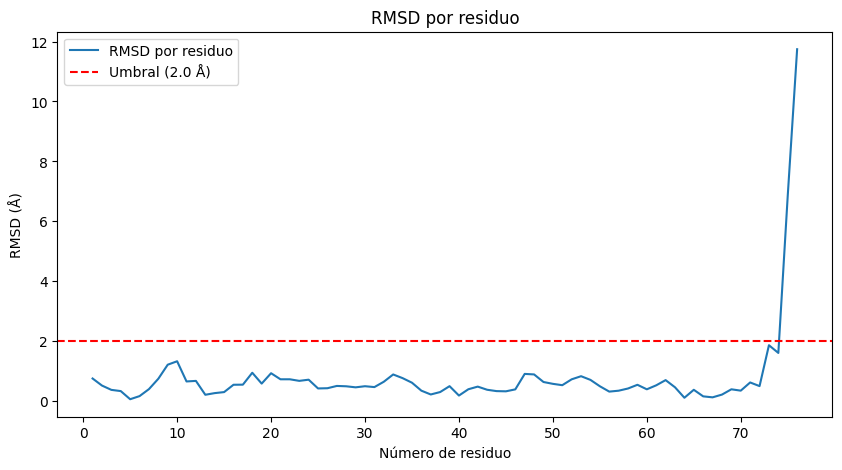

RMSD entre estructuras: 1.681 Å
Distancia máxima entre residuos: 11.743 Å (Residuo 76)
Distancia media entre residuos: 0.784 Å
Número de residuos con RMSD > 2 Å: 2


In [9]:
import numpy as np
import plotly.graph_objects as go
import matplotlib.pyplot as plt
from Bio.PDB import PDBParser, Superimposer

# Función para cargar una estructura PDB y extraer carbonos alfa (CA) de una cadena específica
def cargar_ca(pdb_path, chain_id="A", max_residuos=None):
    parser = PDBParser(QUIET=True)
    estructura = parser.get_structure("Proteina", pdb_path)
    
    # Verificar si la cadena existe
    if chain_id not in [chain.id for chain in estructura[0]]:
        raise ValueError(f"La cadena {chain_id} no existe en el archivo {pdb_path}.")
    
    ca_atoms = []
    for i, res in enumerate(estructura[0][chain_id]):  # Usamos la cadena especificada
        if "CA" in res:
            if max_residuos is not None and i >= max_residuos:
                break
            ca_atoms.append((res["CA"], i + 1))  # Guardar el átomo y el número de residuo
    
    if not ca_atoms:
        raise ValueError(f"No se encontraron carbonos alfa (CA) en la cadena {chain_id} del archivo {pdb_path}.")
    
    return ca_atoms

# Función para alinear estructuras y calcular RMSD por residuo
def alinear_estructuras(ca_exp, ca_af):
    super_imposer = Superimposer()
    super_imposer.set_atoms([atom for atom, _ in ca_exp], [atom for atom, _ in ca_af])
    super_imposer.apply([atom for atom, _ in ca_af])  # Aplica la transformación a la predicción de AlphaFold
    
    # Calcular RMSD por residuo
    rmsd_residuos = np.linalg.norm(
        np.array([atom.get_coord() for atom, _ in ca_exp]) - 
        np.array([atom.get_coord() for atom, _ in ca_af]),
        axis=1
    )
    
    return super_imposer, rmsd_residuos

# Función para graficar con coloración según desviación estructural y exportar HTML
def graficar_estructuras_coloreadas(ca_exp, ca_af, rmsd_residuos, rmsd_global, title="Comparación 3D Alineada"):
    # Convertir a coordenadas NumPy para graficar
    ca_exp_coords = np.array([atom.get_coord() for atom, _ in ca_exp])
    ca_af_coords = np.array([atom.get_coord() for atom, _ in ca_af])

    # Obtener los números de residuo
    residuos = [res_id for _, res_id in ca_af]

    # Definir el rango de colores (0 a 5 Å)
    colores = np.clip(rmsd_residuos, 0, 5)  # Limitar el RMSD a un máximo de 5 Å

    # Crear texto para el "hover"
    hovertext = [
        f"Residuo: {res_id}<br>RMSD: {rmsd:.3f} Å<br>Coordenadas: ({x:.2f}, {y:.2f}, {z:.2f})"
        for res_id, rmsd, (x, y, z) in zip(residuos, rmsd_residuos, ca_af_coords)
    ]

    # Crear gráfico 3D con plotly
    fig = go.Figure()

    # Graficar estructura experimental en azul
    fig.add_trace(go.Scatter3d(
        x=ca_exp_coords[:, 0], y=ca_exp_coords[:, 1], z=ca_exp_coords[:, 2],
        mode='lines+markers',
        marker=dict(size=4, color='blue'),
        line=dict(color='blue', width=2),
        name="Experimental (PDB)"
    ))

    # Graficar estructura AlphaFold con escala de colores mejorada
    fig.add_trace(go.Scatter3d(
        x=ca_af_coords[:, 0], y=ca_af_coords[:, 1], z=ca_af_coords[:, 2],
        mode='lines+markers',
        marker=dict(size=6, color=colores, colorscale='Viridis', cmin=0, cmax=5,
                    colorbar=dict(title="RMSD por residuo (Å)", thickness=20, len=0.5),
                    line=dict(color='red', width=1)),  # Borde rojo para los marcadores
        line=dict(color='red', width=2),
        name="AlphaFold (Predicción)",
        hovertext=hovertext,  # Texto para el "hover"
        hoverinfo="text"  # Mostrar solo el texto personalizado
    ))

    # Configuración del gráfico
    fig.update_layout(
        scene=dict(
            xaxis_title='X (Å)',
            yaxis_title='Y (Å)',
            zaxis_title='Z (Å)',
        ),
        title=f"{title}<br>RMSD Global: {rmsd_global:.3f} Å",
        margin=dict(l=0, r=0, b=0, t=50)  # Ajustar márgenes
    )

    # Mostrar el gráfico interactivo
    fig.show()

    # Exportar el gráfico como HTML interactivo
    fig.write_html("comparacion_3d.html")

# Función para calcular métricas adicionales
def calcular_metricas(ca_exp, ca_af, rmsd_residuos):
    # Distancia máxima entre residuos
    distancias = np.linalg.norm(
        np.array([atom.get_coord() for atom, _ in ca_exp]) - 
        np.array([atom.get_coord() for atom, _ in ca_af]),
        axis=1
    )
    max_distancia = np.max(distancias)
    residuo_max_distancia = np.argmax(distancias) + 1  # +1 porque los residuos empiezan en 1

    # Distancia media entre residuos
    media_distancia = np.mean(distancias)

    # Número de residuos con RMSD alto (por ejemplo, > 2 Å)
    umbral_rmsd = 2.0
    num_residuos_alto_rmsd = np.sum(rmsd_residuos > umbral_rmsd)

    # Gráfico de RMSD por residuo
    plt.figure(figsize=(10, 5))
    plt.plot(range(1, len(rmsd_residuos) + 1), rmsd_residuos, label="RMSD por residuo")
    plt.axhline(y=umbral_rmsd, color='r', linestyle='--', label=f"Umbral ({umbral_rmsd} Å)")
    plt.xlabel("Número de residuo")
    plt.ylabel("RMSD (Å)")
    plt.title("RMSD por residuo")
    plt.legend()
    plt.show()

    # Devolver métricas
    return {
        "max_distancia": max_distancia,
        "residuo_max_distancia": residuo_max_distancia,
        "media_distancia": media_distancia,
        "num_residuos_alto_rmsd": num_residuos_alto_rmsd,
    }

# Cargar las estructuras
pdb_exp_path = "/home/antonio-tapia/Documentos/pdb_files/pdb1ubq.ent"
pdb_af_path = "/home/antonio-tapia/Documentos/alphafold_models/P0CG47.pdb"

# Cargar solo los primeros 76 residuos (o menos si una estructura es más corta)
ca_exp = cargar_ca(pdb_exp_path, chain_id="A", max_residuos=76)
ca_af = cargar_ca(pdb_af_path, chain_id="A", max_residuos=76)

# Verificar que ambas estructuras se cargaron correctamente
if ca_exp is not None and ca_af is not None:
    # Alinear estructuras y calcular RMSD por residuo
    super_imposer, rmsd_residuos = alinear_estructuras(ca_exp, ca_af)
    
    if super_imposer is not None:
        # Graficar estructuras alineadas con colores por desviación
        graficar_estructuras_coloreadas(ca_exp, ca_af, rmsd_residuos, super_imposer.rms,
                                        title="Comparación 3D Alineada con Color por RMSD")
        
        # Calcular métricas adicionales
        metricas = calcular_metricas(ca_exp, ca_af, rmsd_residuos)
        
        # Mostrar el RMSD global y las métricas adicionales
        print(f"RMSD entre estructuras: {super_imposer.rms:.3f} Å")
        print(f"Distancia máxima entre residuos: {metricas['max_distancia']:.3f} Å (Residuo {metricas['residuo_max_distancia']})")
        print(f"Distancia media entre residuos: {metricas['media_distancia']:.3f} Å")
        print(f"Número de residuos con RMSD > 2 Å: {metricas['num_residuos_alto_rmsd']}")

In [14]:
!pip install seaborn

RMSD global: 1.681 Å
Distancia máxima: 11.743 Å
Distancia media: 0.784 Å
Número de residuos con RMSD > 2 Å: 2
Residuos comunes: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76]


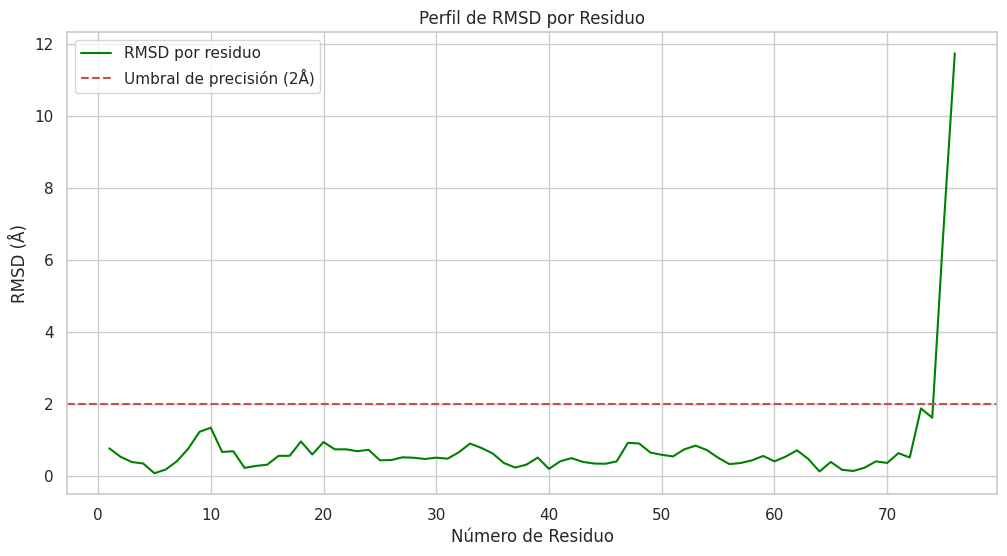

In [23]:
import numpy as np
import pandas as pd
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import seaborn as sns
from Bio.PDB import PDBParser, Superimposer

# Configuración inicial
sns.set_theme(style="whitegrid")  # Estilo moderno para seaborn

# Cargar las estructuras
exp_path = "/home/antonio-tapia/Documentos/pdb_files/pdb1ubq.ent"
af_path = "/home/antonio-tapia/Documentos/alphafold_models/P0CG47.pdb"
chain_id = "A"

# Inicializar el parser de PDB
parser = PDBParser(QUIET=True)

# Cargar la estructura experimental
exp_structure = parser.get_structure("experimental", exp_path)
exp_cas = []
exp_res_ids = []
for res in exp_structure[0][chain_id]:
    if "CA" in res:
        exp_cas.append(res["CA"])
        exp_res_ids.append(res.id[1])  # Guardar el número de residuo

# Cargar la estructura de AlphaFold
af_structure = parser.get_structure("alphafold", af_path)
af_cas = []
af_res_ids = []
for res in af_structure[0][chain_id]:
    if "CA" in res:
        af_cas.append(res["CA"])
        af_res_ids.append(res.id[1])  # Guardar el número de residuo

# Encontrar residuos comunes
common_res_ids = set(exp_res_ids).intersection(set(af_res_ids))

# Filtrar CAs para residuos comunes
exp_cas_filtered = []
af_cas_filtered = []
for exp_ca, exp_res_id in zip(exp_cas, exp_res_ids):
    if exp_res_id in common_res_ids:
        exp_cas_filtered.append(exp_ca)
        
for af_ca, af_res_id in zip(af_cas, af_res_ids):
    if af_res_id in common_res_ids:
        af_cas_filtered.append(af_ca)

# Verificar que haya residuos comunes
if not exp_cas_filtered or not af_cas_filtered:
    raise ValueError("No hay residuos comunes con carbono alfa (CA) en ambas estructuras")

# Alinear estructuras
super_imposer = Superimposer()
super_imposer.set_atoms(exp_cas_filtered, af_cas_filtered)
super_imposer.apply(af_cas_filtered)

# Calcular RMSD por residuo
rmsd_per_residue = []
for exp_ca, af_ca in zip(exp_cas_filtered, af_cas_filtered):
    dist = np.linalg.norm(exp_ca.get_coord() - af_ca.get_coord())
    rmsd_per_residue.append(dist)

# Métricas adicionales
rmsd_global = super_imposer.rms
max_distance = np.max(rmsd_per_residue)
mean_distance = np.mean(rmsd_per_residue)
num_high_rmsd = np.sum(np.array(rmsd_per_residue) > 2.0)

# Mostrar métricas
print(f"RMSD global: {rmsd_global:.3f} Å")
print(f"Distancia máxima: {max_distance:.3f} Å")
print(f"Distancia media: {mean_distance:.3f} Å")
print(f"Número de residuos con RMSD > 2 Å: {num_high_rmsd}")
print(f"Residuos comunes: {sorted(common_res_ids)}")

# Gráfico de RMSD por residuo
plt.figure(figsize=(12, 6))
sns.lineplot(x=range(1, len(rmsd_per_residue) + 1), y=rmsd_per_residue, color='green', label="RMSD por residuo")
plt.axhline(y=2.0, color='r', linestyle='--', label='Umbral de precisión (2Å)')
plt.title('Perfil de RMSD por Residuo')
plt.xlabel('Número de Residuo')
plt.ylabel('RMSD (Å)')
plt.legend()
plt.show()

# Visualización 3D interactiva
exp_coords = np.array([atom.get_coord() for atom in exp_cas_filtered])
af_coords = np.array([atom.get_coord() for atom in af_cas_filtered])

fig = go.Figure()

# Graficar estructura experimental
fig.add_trace(go.Scatter3d(
    x=exp_coords[:, 0], y=exp_coords[:, 1], z=exp_coords[:, 2],
    mode='lines+markers',
    marker=dict(size=4, color='blue'),
    line=dict(color='blue', width=2),
    name="Experimental (PDB)"
))

# Graficar estructura AlphaFold
fig.add_trace(go.Scatter3d(
    x=af_coords[:, 0], y=af_coords[:, 1], z=af_coords[:, 2],
    mode='lines+markers',
    marker=dict(size=4, color='red'),
    line=dict(color='red', width=2),
    name="AlphaFold (Predicción)"
))

# Configuración del gráfico
fig.update_layout(
    scene=dict(
        xaxis_title='X (Å)',
        yaxis_title='Y (Å)',
        zaxis_title='Z (Å)',
    ),
    title="Comparación 3D: Experimental vs AlphaFold",
    margin=dict(l=0, r=0, b=0, t=30)
)

# Mostrar el gráfico interactivo
fig.show()

In [29]:
import matplotlib.pyplot as plt
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'petroff10', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


Error en análisis de estructura secundaria: [Errno 2] No such file or directory: 'mkdssp'
No hay información de estructura secundaria disponible
=== Resumen del Análisis ===

RMSD Global: 1.68 Å
RMSD Promedio: 0.78 Å
Residuos con RMSD > 2Å: 2


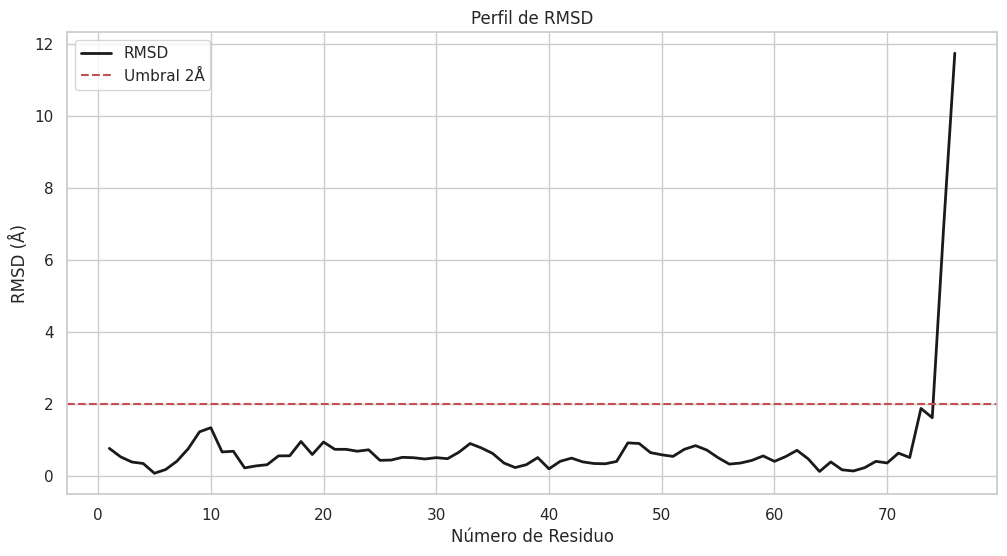

In [22]:
# Importaciones necesarias
import numpy as np
import pandas as pd
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import seaborn as sns
from Bio.PDB import PDBParser, Superimposer
from Bio.PDB.DSSP import dssp_dict_from_pdb_file
from typing import Dict, List, Tuple

# Configuración de plotting
sns.set_theme(style="whitegrid")  # Configura el estilo de seaborn

class StructureComparator:
    def __init__(self, exp_path: str, af_path: str, chain_id: str = "A"):
        self.parser = PDBParser(QUIET=True)
        self.exp_path = exp_path
        self.af_path = af_path
        self.chain_id = chain_id
        
        # Cargar estructuras
        self.exp_structure = self.parser.get_structure("experimental", exp_path)
        self.af_structure = self.parser.get_structure("alphafold", af_path)
        
        # Inicializar resultados
        self.results = {}
        
        # Colores para visualización
        self.colors = {
            'helix': '#FF9999',
            'sheet': '#99FF99',
            'loop': '#9999FF',
            'exp': '#2E86C1',  # Azul para la estructura experimental
            'af': '#E74C3C'    # Rojo para AlphaFold
        }

    def _get_cas(self, structure):
        """
        Extrae los carbonos alfa y sus números de residuo de una estructura.
        
        Args:
            structure: Estructura de Bio.PDB
            
        Returns:
            tuple: (lista de CAs, lista de números de residuo)
        """
        cas = []
        res_ids = []
        
        for res in structure[0][self.chain_id]:
            if "CA" in res:
                cas.append(res["CA"])
                res_ids.append(res.id[1])
                
        return cas, res_ids
    
    def analyze_structures(self):
        """Realiza un análisis completo de las estructuras"""
        # 1. Análisis básico de RMSD
        self._calculate_rmsd()
        
        # 2. Análisis de estructura secundaria
        self._analyze_secondary_structure()
        
        # 3. Análisis por regiones
        self._analyze_by_regions()
        
        return self.results
    
    def _calculate_rmsd(self):
        """Calcula RMSD y métricas relacionadas"""
        # Obtener CAs y filtrar residuos comunes
        exp_cas, exp_res_ids = self._get_cas(self.exp_structure)
        af_cas, af_res_ids = self._get_cas(self.af_structure)
        
        common_res_ids = sorted(set(exp_res_ids) & set(af_res_ids))
        
        # Filtrar CAs para residuos comunes
        exp_cas_filtered = [ca for ca, res_id in zip(exp_cas, exp_res_ids) if res_id in common_res_ids]
        af_cas_filtered = [ca for ca, res_id in zip(af_cas, af_res_ids) if res_id in common_res_ids]
        
        # Alinear y calcular RMSD
        super_imposer = Superimposer()
        super_imposer.set_atoms(exp_cas_filtered, af_cas_filtered)
        super_imposer.apply(af_cas_filtered)
        
        # Calcular RMSD por residuo
        rmsd_per_residue = []
        for exp_ca, af_ca in zip(exp_cas_filtered, af_cas_filtered):
            dist = np.linalg.norm(exp_ca.get_coord() - af_ca.get_coord())
            rmsd_per_residue.append(dist)
        
        # Guardar resultados
        self.results['rmsd'] = {
            'global': super_imposer.rms,
            'per_residue': np.array(rmsd_per_residue),
            'residue_ids': np.array(common_res_ids),
            'max': np.max(rmsd_per_residue),
            'mean': np.mean(rmsd_per_residue),
            'std': np.std(rmsd_per_residue),
            'high_rmsd_count': np.sum(np.array(rmsd_per_residue) > 2.0)
        }
    
    def _analyze_secondary_structure(self):
        """Analiza la estructura secundaria de ambas estructuras"""
        try:
            # Calcular DSSP para ambas estructuras
            exp_dssp = dssp_dict_from_pdb_file(self.exp_path)[0]
            af_dssp = dssp_dict_from_pdb_file(self.af_path)[0]
            
            # Comparar estructura secundaria
            ss_comparison = {}
            for res_id in self.results['rmsd']['residue_ids']:
                key = ('A', (' ', res_id, ' '))
                if key in exp_dssp and key in af_dssp:
                    exp_ss = exp_dssp[key][2]
                    af_ss = af_dssp[key][2]
                    ss_comparison[res_id] = {
                        'exp_ss': exp_ss,
                        'af_ss': af_ss,
                        'match': exp_ss == af_ss
                    }
            
            self.results['secondary_structure'] = ss_comparison
        except Exception as e:
            print(f"Error en análisis de estructura secundaria: {str(e)}")
            self.results['secondary_structure'] = {}
    
    def _analyze_by_regions(self):
        """Analiza RMSD por tipos de estructura secundaria"""
        if not self.results.get('secondary_structure'):
            print("No hay información de estructura secundaria disponible")
            return
            
        ss_rmsd = {
            'helix': [],
            'sheet': [],
            'loop': []
        }
        
        for i, res_id in enumerate(self.results['rmsd']['residue_ids']):
            if res_id in self.results['secondary_structure']:
                ss = self.results['secondary_structure'][res_id]['exp_ss']
                rmsd = self.results['rmsd']['per_residue'][i]
                
                if ss in 'GHI':  # Hélices
                    ss_rmsd['helix'].append(rmsd)
                elif ss in 'EB':  # Láminas
                    ss_rmsd['sheet'].append(rmsd)
                else:  # Loops
                    ss_rmsd['loop'].append(rmsd)
        
        # Calcular estadísticas por región
        self.results['region_analysis'] = {
            region: {
                'mean': np.mean(rmsd) if rmsd else 0,
                'std': np.std(rmsd) if rmsd else 0,
                'count': len(rmsd)
            }
            for region, rmsd in ss_rmsd.items()
        }
    
    def plot_rmsd_profile(self):
        """Genera un gráfico de RMSD por residuo"""
        plt.figure(figsize=(12, 6))
        
        # Graficar RMSD
        plt.plot(self.results['rmsd']['residue_ids'], 
                self.results['rmsd']['per_residue'],
                'k-', label='RMSD', linewidth=2)
        
        # Línea de umbral
        plt.axhline(y=2.0, color='r', linestyle='--', label='Umbral 2Å')
        
        plt.xlabel('Número de Residuo')
        plt.ylabel('RMSD (Å)')
        plt.title('Perfil de RMSD')
        plt.legend()
        
        return plt.gcf()
    
    def plot_3d_comparison(self):
        """Genera una visualización 3D interactiva con colores basados en RMSD"""
        if 'rmsd' not in self.results:
            raise ValueError("Primero debes calcular el RMSD")
        
        # Extraer coordenadas de CAs
        exp_cas, _ = self._get_cas(self.exp_structure)
        af_cas, _ = self._get_cas(self.af_structure)
        
        exp_coords = np.array([atom.get_coord() for atom in exp_cas])
        af_coords = np.array([atom.get_coord() for atom in af_cas])
        
        # Normalizar RMSD para colores
        rmsd_per_residue = self.results['rmsd']['per_residue']
        colors = np.interp(rmsd_per_residue, (0, 5), (0, 1))  # Normalizar entre 0 y 1
        
        # Crear gráfico 3D con plotly
        fig = go.Figure()

        # Graficar estructura experimental
        fig.add_trace(go.Scatter3d(
            x=exp_coords[:, 0], y=exp_coords[:, 1], z=exp_coords[:, 2],
            mode='lines+markers',
            marker=dict(size=4, color=self.colors['exp']),
            line=dict(color=self.colors['exp'], width=2),
            name="Experimental (PDB)"
        ))

        # Graficar estructura AlphaFold con colores basados en RMSD
        fig.add_trace(go.Scatter3d(
            x=af_coords[:, 0], y=af_coords[:, 1], z=af_coords[:, 2],
            mode='lines+markers',
            marker=dict(size=6, color=colors, colorscale='Viridis', cmin=0, cmax=1,
                        colorbar=dict(title="RMSD (Å)", thickness=20, len=0.5),
                        line=dict(color='red', width=1)),  # Borde rojo para los marcadores
            line=dict(color='red', width=2),
            name="AlphaFold (Predicción)"
        ))

        # Configuración del gráfico
        fig.update_layout(
            scene=dict(
                xaxis_title='X (Å)',
                yaxis_title='Y (Å)',
                zaxis_title='Z (Å)',
            ),
            title="Comparación 3D: Experimental vs AlphaFold",
            margin=dict(l=0, r=0, b=0, t=30)
        )

        # Mostrar el gráfico interactivo
        fig.show()
    
    def print_summary(self):
        """Imprime un resumen del análisis"""
        print("=== Resumen del Análisis ===")
        print(f"\nRMSD Global: {self.results['rmsd']['global']:.2f} Å")
        print(f"RMSD Promedio: {self.results['rmsd']['mean']:.2f} Å")
        print(f"Residuos con RMSD > 2Å: {self.results['rmsd']['high_rmsd_count']}")
        
        if 'region_analysis' in self.results:
            print("\nAnálisis por Región:")
            for region, stats in self.results['region_analysis'].items():
                print(f"\n{region.capitalize()}:")
                print(f"  Media RMSD: {stats['mean']:.2f} Å")
                print(f"  Desv. Est.: {stats['std']:.2f} Å")
                print(f"  Número de residuos: {stats['count']}")

# Uso del código
comparator = StructureComparator(
    exp_path="/home/antonio-tapia/Documentos/pdb_files/pdb1ubq.ent",
    af_path="/home/antonio-tapia/Documentos/alphafold_models/P0CG47.pdb",
    chain_id="A"
)

# Realizar análisis
comparator.analyze_structures()

# Mostrar resultados
comparator.print_summary()
comparator.plot_rmsd_profile()
plt.show()

# Visualización 3D interactiva
comparator.plot_3d_comparison()

In [25]:
# Importaciones necesarias
import numpy as np
import pandas as pd
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import seaborn as sns
from Bio.PDB import PDBParser, Superimposer
from Bio.PDB.DSSP import dssp_dict_from_pdb_file
from typing import Dict, List, Tuple
import os
import warnings
from IPython.display import display, HTML

# Configuración de plotting
sns.set_theme(style="whitegrid")  # Configura el estilo de seaborn
warnings.filterwarnings("ignore")  # Ignorar advertencias de BioPython

class StructureComparator:
    def __init__(self, exp_path: str, af_path: str, chain_id: str = "A"):
        """
        Inicializa el comparador de estructuras.
        
        Args:
            exp_path: Ruta al archivo PDB experimental
            af_path: Ruta al archivo PDB de AlphaFold
            chain_id: ID de la cadena a analizar
        """
        print(f"Inicializando comparador con:\n  Estructura experimental: {exp_path}\n  Estructura AlphaFold: {af_path}\n  Cadena: {chain_id}")
        
        self.parser = PDBParser(QUIET=True)
        self.exp_path = exp_path
        self.af_path = af_path
        self.chain_id = chain_id
        
        # Verificar que los archivos existen
        if not os.path.exists(exp_path):
            raise FileNotFoundError(f"No se encuentra el archivo experimental: {exp_path}")
        if not os.path.exists(af_path):
            raise FileNotFoundError(f"No se encuentra el archivo AlphaFold: {af_path}")
        
        # Cargar estructuras
        try:
            self.exp_structure = self.parser.get_structure("experimental", exp_path)
            self.af_structure = self.parser.get_structure("alphafold", af_path)
            print("✓ Estructuras cargadas correctamente")
        except Exception as e:
            raise ValueError(f"Error al cargar estructuras: {str(e)}")
        
        # Validar que la cadena existe
        if chain_id not in [chain.id for chain in self.exp_structure[0]]:
            raise ValueError(f"La cadena {chain_id} no existe en la estructura experimental")
        if chain_id not in [chain.id for chain in self.af_structure[0]]:
            raise ValueError(f"La cadena {chain_id} no existe en la estructura AlphaFold")
        
        # Inicializar resultados
        self.results = {}
        
        # Colores para visualización
        self.colors = {
            'helix': '#FF9999',
            'sheet': '#99FF99',
            'loop': '#9999FF',
            'exp': '#2E86C1',  # Azul para la estructura experimental
            'af': '#E74C3C'    # Rojo para AlphaFold
        }
        
        # Mostrar información básica
        exp_cas, _ = self._get_cas(self.exp_structure)
        af_cas, _ = self._get_cas(self.af_structure)
        print(f"  Residuos con CA en estructura experimental: {len(exp_cas)}")
        print(f"  Residuos con CA en estructura AlphaFold: {len(af_cas)}")

In [24]:
def _get_cas(self, structure):
        """
        Extrae los carbonos alfa y sus números de residuo de una estructura.
        
        Args:
            structure: Estructura de Bio.PDB
            
        Returns:
            tuple: (lista de CAs, lista de números de residuo)
        """
        cas = []
        res_ids = []
        
        for res in structure[0][self.chain_id]:
            if "CA" in res:
                cas.append(res["CA"])
                res_ids.append(res.id[1])
                
        return cas, res_ids
    
    def analyze_structures(self):
        """
        Realiza un análisis completo de las estructuras.
        
        Esta función ejecuta todos los análisis disponibles y guarda 
        los resultados para su visualización posterior.
        """
        print("\nIniciando análisis completo de estructuras...")
        
        # 1. Análisis básico de RMSD
        self._calculate_rmsd()
        print(f"✓ RMSD calculado: {self.results['rmsd']['global']:.2f} Å")
        
        # 2. Análisis de estructura secundaria
        self._analyze_secondary_structure()
        
        # 3. Análisis por regiones
        self._analyze_by_regions()
        
        # 4. Análisis de contactos
        try:
            self.analyze_contacts()
            print("✓ Análisis de contactos completado")
        except Exception as e:
            print(f"✗ Error en análisis de contactos: {str(e)}")
        
        # 5. Análisis de pLDDT
        try:
            self.analyze_plddt()
            print("✓ Análisis de pLDDT completado")
        except Exception as e:
            print(f"✗ Error en análisis de pLDDT: {str(e)}")
        
        print("\nAnálisis completo finalizado.")
        return self.results
    
    def _calculate_rmsd(self):
        """
        Calcula RMSD global y por residuo entre las estructuras.
        
        Este método alinea las estructuras y calcula la desviación
        cuadrática media para cada residuo y global.
        """
        # Obtener CAs y filtrar residuos comunes
        exp_cas, exp_res_ids = self._get_cas(self.exp_structure)
        af_cas, af_res_ids = self._get_cas(self.af_structure)
        
        common_res_ids = sorted(set(exp_res_ids) & set(af_res_ids))
        print(f"  Residuos comunes para análisis RMSD: {len(common_res_ids)}")
        
        # Filtrar CAs para residuos comunes
        exp_cas_filtered = [ca for ca, res_id in zip(exp_cas, exp_res_ids) if res_id in common_res_ids]
        af_cas_filtered = [ca for ca, res_id in zip(af_cas, af_res_ids) if res_id in common_res_ids]
        
        # Verificar que tenemos al menos 3 residuos (mínimo para superposición)
        if len(exp_cas_filtered) < 3:
            raise ValueError("Se necesitan al menos 3 residuos comunes para alinear estructuras")
        
        # Alinear y calcular RMSD
        super_imposer = Superimposer()
        super_imposer.set_atoms(exp_cas_filtered, af_cas_filtered)
        super_imposer.apply(af_cas_filtered)
        
        # Calcular RMSD por residuo
        rmsd_per_residue = []
        for exp_ca, af_ca in zip(exp_cas_filtered, af_cas_filtered):
            dist = np.linalg.norm(exp_ca.get_coord() - af_ca.get_coord())
            rmsd_per_residue.append(dist)
        
        # Guardar resultados
        self.results['rmsd'] = {
            'global': super_imposer.rms,
            'per_residue': np.array(rmsd_per_residue),
            'residue_ids': np.array(common_res_ids),
            'max': np.max(rmsd_per_residue),
            'mean': np.mean(rmsd_per_residue),
            'std': np.std(rmsd_per_residue),
            'high_rmsd_count': np.sum(np.array(rmsd_per_residue) > 2.0)
        }

IndentationError: unindent does not match any outer indentation level (<string>, line 21)